# Workshop 3: CNN state of the art

In this workshop we will learn techniques to increase the performance of CNN and how to use state of the art architectures. The structure of the workshop will be the following:



1.   Dropout
2.   Batch Normalization
3.   Data Augmentation
4.   Transfer learning



## 1. Dropout

In [3]:
# Import dependence for downloading CIFAR10
from keras.datasets import cifar10 

In [4]:
(X_train, y_train), (X_testval, y_testval) = cifar10.load_data()

In [5]:
# Import dependence for handling arrays
import numpy as np

In [6]:
# Change the range of pixels from [0 255] to [0 1]
X_train_fl = X_train.astype('float32')
X_testval_fl = X_testval.astype('float32')
X_train_fl /= 255
X_testval_fl /= 255

In [7]:
# Import dependence for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [8]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_train_oh = onehot_enc.fit_transform(y_train.reshape(X_train.shape[0], 1)).toarray()
y_testval_oh = onehot_enc.fit_transform(y_testval.reshape(X_testval.shape[0], 1)).toarray()

In [9]:
# Show one-hot encoded labels shape
print("Training one-hot encoded labels shape:", y_train_oh.shape)
print("Testing one-hot encoded labels shape:", y_testval_oh.shape)

Training one-hot encoded labels shape: (50000, 10)
Testing one-hot encoded labels shape: (10000, 10)


In [10]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_fl[:samples_test_nb]
y_val = y_testval_oh[:samples_test_nb]
X_test = X_testval_fl[samples_test_nb:]
y_test = y_testval_oh[samples_test_nb:]

In [11]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val.shape)
print("Testing matrix shape:", X_test.shape)

Validation matrix shape: (5000, 32, 32, 3)
Testing matrix shape: (5000, 32, 32, 3)


In [12]:
# Import depence for CNN
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [11]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(conv_layer_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(conv_layer_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
flatten_layer = Flatten()(conv_layer_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
dropout = Dropout(rate=0.4)(dense_layer)#How many neurons power off
output_layer = Dense(10, activation='softmax')(dropout)
model= Model(inputs=input_layer, outputs=output_layer)

In [12]:
# Show a summary of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0     

In [13]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=50, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/50
391/391 [==============================] - 39s 18ms/step - loss: 1.9820 - accuracy: 0.2666 - val_loss: 1.5128 - val_accuracy: 0.4544
Epoch 2/50
391/391 [==============================] - 4s 9ms/step - loss: 1.5431 - accuracy: 0.4423 - val_loss: 1.4253 - val_accuracy: 0.5018
Epoch 3/50
391/391 [==============================] - 3s 9ms/step - loss: 1.4425 - accuracy: 0.4803 - val_loss: 1.3486 - val_accuracy: 0.5280
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 1.3644 - accuracy: 0.5113 - val_loss: 1.2540 - val_accuracy: 0.5640
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 1.3066 - accuracy: 0.5338 - val_loss: 1.2127 - val_accuracy: 0.5768
Epoch 6/50
391/391 [==============================] - 3s 8ms/step - loss: 1.2573 - accuracy: 0.5533 - val_loss: 1.1788 - val_accuracy: 0.5846
Epoch 7/50
391/391 [==============================] - 4s 9ms/step - loss: 1.2211 - accuracy: 0.5651 - val_loss: 1.1502 - val_accuracy: 0.6022
Epoc

In [13]:
# Import dependence for visualization of images
import matplotlib.pyplot as plt

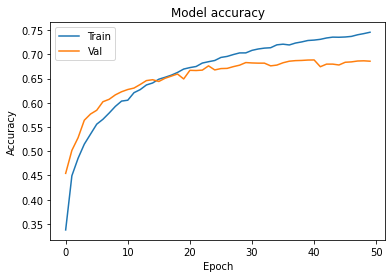

In [16]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
# plt.ylim(0, 1)
plt.show()

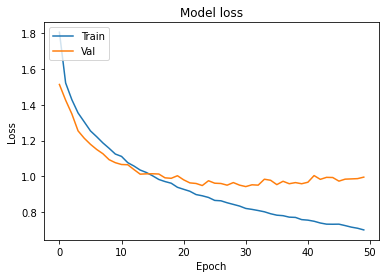

In [17]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

## 2. Batch Normalization

In [14]:
from keras.layers import BatchNormalization
from keras.optimizers import Adam

In [19]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
bn_1 = BatchNormalization()(conv_layer_1)#Output of convolucional layer
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(bn_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
bn_2 = BatchNormalization()(conv_layer_2)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(bn_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
bn_3 = BatchNormalization()(conv_layer_3)
flatten_layer = Flatten()(bn_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
dropout = Dropout(rate=0.4)(dense_layer)
output_layer = Dense(10, activation='softmax')(dropout)
model= Model(inputs=input_layer, outputs=output_layer)

In [20]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(),
              metrics=['accuracy'])

In [21]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 6s 13ms/step - loss: 1.9812 - accuracy: 0.3270 - val_loss: 1.6694 - val_accuracy: 0.4066
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.3704 - accuracy: 0.5086 - val_loss: 1.3411 - val_accuracy: 0.5218
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 1.2153 - accuracy: 0.5709 - val_loss: 1.1248 - val_accuracy: 0.5986
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 1.1076 - accuracy: 0.6098 - val_loss: 1.1481 - val_accuracy: 0.5974
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 1.0355 - accuracy: 0.6360 - val_loss: 0.9970 - val_accuracy: 0.6542
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9854 - accuracy: 0.6538 - val_loss: 0.9649 - val_accuracy: 0.6618
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9426 - accuracy: 0.6677 - val_loss: 1.0356 - val_accuracy: 0.6400

In [22]:
# Compile the model with new learning rate
model= Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

In [23]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 5s 12ms/step - loss: 1.3826 - accuracy: 0.5231 - val_loss: 1.5354 - val_accuracy: 0.5212
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.0738 - accuracy: 0.6255 - val_loss: 1.9239 - val_accuracy: 0.4394
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 1.0041 - accuracy: 0.6507 - val_loss: 1.3609 - val_accuracy: 0.5606
Epoch 4/20
391/391 [==============================] - 4s 9ms/step - loss: 0.9699 - accuracy: 0.6599 - val_loss: 1.5706 - val_accuracy: 0.5404
Epoch 5/20
391/391 [==============================] - 4s 9ms/step - loss: 0.9468 - accuracy: 0.6675 - val_loss: 1.2292 - val_accuracy: 0.5868
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9015 - accuracy: 0.6881 - val_loss: 1.2448 - val_accuracy: 0.5844
Epoch 7/20
391/391 [==============================] - 4s 9ms/step - loss: 0.9042 - accuracy: 0.6818 - val_loss: 1.1510 - val_accuracy: 0.6224
Ep

## 3. Data Augmentation

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
# Define data generator
train_datagen = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rotation_range = 10,
)

In [26]:
# Function to convert a categorical class to its corresponding string
def class_to_string(class_int):
    classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
               "horse", "ship", "truck"]
    return classes[class_int]

In [27]:
plt.rcParams['figure.figsize'] = (10,10)  # Configure figure size for 
                                          # appropriate visualization

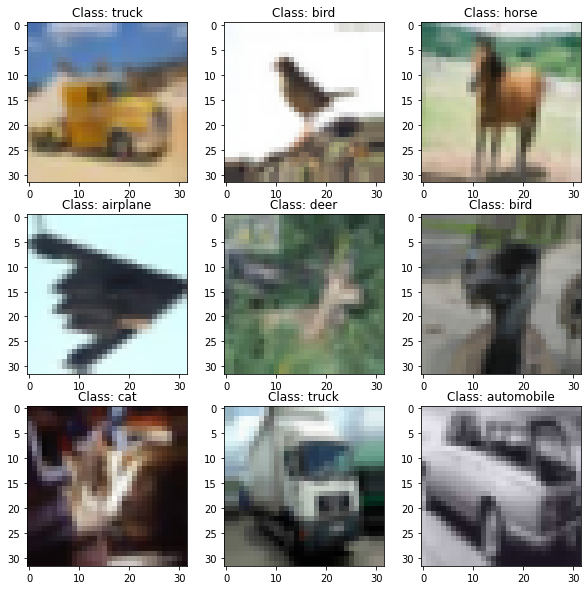

In [28]:
# Show generated data
iterator = train_datagen.flow(X_train_fl, y_train_oh, batch_size=9)
samples, labels = next(iterator)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(samples[i], interpolation='none')
    class_str = class_to_string(np.argmax(labels[i]))
    plt.title("Class: " + class_str)

In [29]:
# Compile the model with new learning rate
model= Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [30]:
# Train the model
batch_size = 100
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh, 
                                                 batch_size=batch_size), 
                              epochs=20,
                              steps_per_epoch=steps_per_epoch, #En un epoch cuantos imagenes pasas
                              validation_data=(X_val, y_val))

c:\users\juanl\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 21s 39ms/step - loss: 1.0366 - accuracy: 0.6451 - val_loss: 0.9004 - val_accuracy: 0.7036
Epoch 2/20
500/500 [==============================] - 20s 40ms/step - loss: 0.9665 - accuracy: 0.6681 - val_loss: 0.8736 - val_accuracy: 0.7094
Epoch 3/20
500/500 [==============================] - 21s 42ms/step - loss: 0.9400 - accuracy: 0.6779 - val_loss: 0.8574 - val_accuracy: 0.7046
Epoch 4/20
500/500 [==============================] - 20s 39ms/step - loss: 0.9095 - accuracy: 0.6879 - val_loss: 0.8409 - val_accuracy: 0.7128
Epoch 5/20
500/500 [==============================] - 19s 39ms/step - loss: 0.9121 - accuracy: 0.6865 - val_loss: 0.8510 - val_accuracy: 0.7076
Epoch 6/20
500/500 [==============================] - 20s 41ms/step - loss: 0.8939 - accuracy: 0.6890 - val_loss: 0.8459 - val_accuracy: 0.7104
Epoch 7/20
500/500 [==============================] - 20s 40ms/step - loss: 0.8952 - accuracy: 0.6926 - val_loss: 0.8126 - val_accuracy:

In [32]:
# Train the model
batch_size = 100
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh, 
                                                 batch_size=batch_size), 
                              epochs=100,
                              steps_per_epoch=steps_per_epoch, 
                              validation_data=(X_val, y_val))

Epoch 1/100
  3/500 [..............................] - ETA: 20s - loss: 0.8548 - accuracy: 0.6933

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


500/500 [==============================] - 21s 42ms/step - loss: 0.8692 - accuracy: 0.6958 - val_loss: 0.8258 - val_accuracy: 0.7176
Epoch 2/100
500/500 [==============================] - 21s 41ms/step - loss: 0.8750 - accuracy: 0.6970 - val_loss: 0.8469 - val_accuracy: 0.7142
Epoch 3/100
500/500 [==============================] - 21s 42ms/step - loss: 0.8727 - accuracy: 0.6964 - val_loss: 0.8996 - val_accuracy: 0.7050
Epoch 4/100
500/500 [==============================] - 20s 41ms/step - loss: 0.8633 - accuracy: 0.6999 - val_loss: 0.8129 - val_accuracy: 0.7200
Epoch 5/100
500/500 [==============================] - 21s 42ms/step - loss: 0.8607 - accuracy: 0.7003 - val_loss: 0.8292 - val_accuracy: 0.7170
Epoch 6/100
500/500 [==============================] - 21s 42ms/step - loss: 0.8608 - accuracy: 0.7008 - val_loss: 0.8856 - val_accuracy: 0.7050
Epoch 7/100
500/500 [==============================] - 21s 41ms/step - loss: 0.8646 - accuracy: 0.6994 - val_loss: 0.8282 - val_accuracy: 0.71

## 4. Transfer Learning

In [1]:
# Import dependences for transfer learning
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import UpSampling2D
from keras.optimizers import RMSprop

In [15]:
# Define the model
resnet_model = ResNet50(weights='imagenet', include_top=False, 
                        input_shape=(256, 256, 3))
model = Sequential()
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(resnet_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [16]:
# Compile the model
model.compile(optimizer=RMSprop(lr=2e-5), loss='categorical_crossentropy', 
              metrics=['acc'])

In [17]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=5, batch_size=50, 
                    validation_data=(X_val, y_val))

Epoch 1/5


ResourceExhaustedError:  OOM when allocating tensor with shape[50,256,64,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential_1/resnet50/conv2_block1_0_conv/Conv2D (defined at <ipython-input-17-74523cd792f9>:2) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_21505]

Function call stack:
train_function


In [20]:
# Train the model
batch_size = 20
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh, 
                                                 batch_size=batch_size), 
                              epochs=5,
                              steps_per_epoch=steps_per_epoch, 
                              validation_data=(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
2500/2500 [==============================] - 742s 293ms/step - loss: 0.5687 - acc: 0.8554 - val_loss: 0.2378 - val_acc: 0.9338
Epoch 2/5
2500/2500 [==============================] - 731s 292ms/step - loss: 0.4999 - acc: 0.8745 - val_loss: 0.2294 - val_acc: 0.9340
Epoch 3/5
2500/2500 [==============================] - 732s 293ms/step - loss: 0.4551 - acc: 0.8867 - val_loss: 0.2056 - val_acc: 0.9438
Epoch 4/5
2500/2500 [==============================] - 733s 293ms/step - loss: 0.4077 - acc: 0.8989 - val_loss: 0.2058 - val_acc: 0.9426
Epoch 5/5
2500/2500 [==============================] - 733s 293ms/step - loss: 0.3646 - acc: 0.9106 - val_loss: 0.1697 - val_acc: 0.9480


# Exercise 1: Experiment with other pre-trained models to evaluate results

# Exercise 2: Use the concepts learnt to train a classifier for CIFAR100 dataset

In [18]:
from keras.datasets import cifar100

In [19]:
(X_train, y_train), (X_testval, y_testval) = cifar100.load_data()

169009152/169001437 [==============================] - 57s 0us/step


In [20]:
# Change the range of pixels from [0 255] to [0 1]
X_train_fl = X_train.astype('float32')
X_testval_fl = X_testval.astype('float32')
X_train_fl /= 255
X_testval_fl /= 255

In [21]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_train_oh = onehot_enc.fit_transform(y_train.reshape(X_train.shape[0], 1)).toarray()
y_testval_oh = onehot_enc.fit_transform(y_testval.reshape(X_testval.shape[0], 1)).toarray()

In [22]:
# Show one-hot encoded labels shape
print("Training one-hot encoded labels shape:", y_train_oh.shape)
print("Testing one-hot encoded labels shape:", y_testval_oh.shape)

Training one-hot encoded labels shape: (50000, 100)
Testing one-hot encoded labels shape: (10000, 100)


In [23]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_fl[:samples_test_nb]
y_val = y_testval_oh[:samples_test_nb]
X_test = X_testval_fl[samples_test_nb:]
y_test = y_testval_oh[samples_test_nb:]

In [24]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val.shape)
print("Testing matrix shape:", X_test.shape)

Validation matrix shape: (5000, 32, 32, 3)
Testing matrix shape: (5000, 32, 32, 3)


In [25]:
from keras.applications import DenseNet121

In [29]:
# Define the model
densenet_model = DenseNet121(weights='imagenet', include_top=False, 
                        input_shape=(256, 256, 3))
model = Sequential()
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(densenet_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(100, activation='softmax'))

In [30]:
# Compile the model
model.compile(optimizer=RMSprop(lr=2e-5), loss='categorical_crossentropy', 
              metrics=['acc'])

In [31]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=5, batch_size=50, 
                    validation_data=(X_val, y_val))

Epoch 1/5


ResourceExhaustedError:  OOM when allocating tensor with shape[3200,130,130] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential_3/densenet121/zero_padding2d_3/Pad (defined at <ipython-input-31-74523cd792f9>:2) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_67276]

Function call stack:
train_function
